# Exploration of Colatz Conjecture, a.k.a the $3n + 1$-problem
----
Background: https://en.wikipedia.org/wiki/Collatz_conjecture
$$
f(n) = \frac{n}{2} \quad\text{   if $n$ is divisible by 2}\\
f(n) = 3n + 1 \quad \text{   otherwise}
$$

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt


In [6]:
%%time

# This "memo-isation" is a programming technique call dynamic programming used to 
# speed up computation with a lot of recursive structure
memo = {1 : 0}

def iterate(n):
    if n % 2 == 0:
        return n // 2
    else:
        return (3 * n + 1)

N = 50000
remaining = set(range(1, N)) - set(memo.keys())
num = 10 if not remaining else min(remaining)
chain = [num]
c = num
while c < N and remaining:
    result = iterate(num)
    chain.append(result)
    if result in memo:
        for i in range(len(chain) - 2, -1 , -1):
            memo[chain[i]] = memo[chain[i + 1]] + 1
        remaining = remaining - set(memo.keys())
        if not remaining:
            break
        num = min(remaining)
        c = num
        chain = [num]
    else: 
        num = result


print(len(memo))


108172
CPU times: user 51.9 s, sys: 29.7 ms, total: 51.9 s
Wall time: 51.9 s


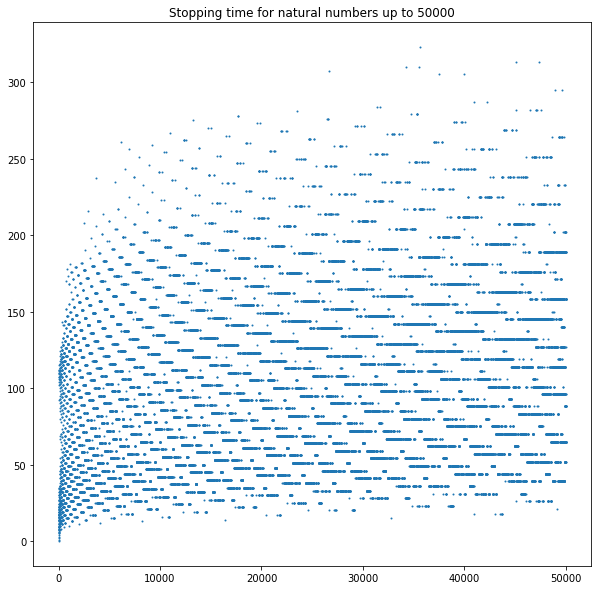

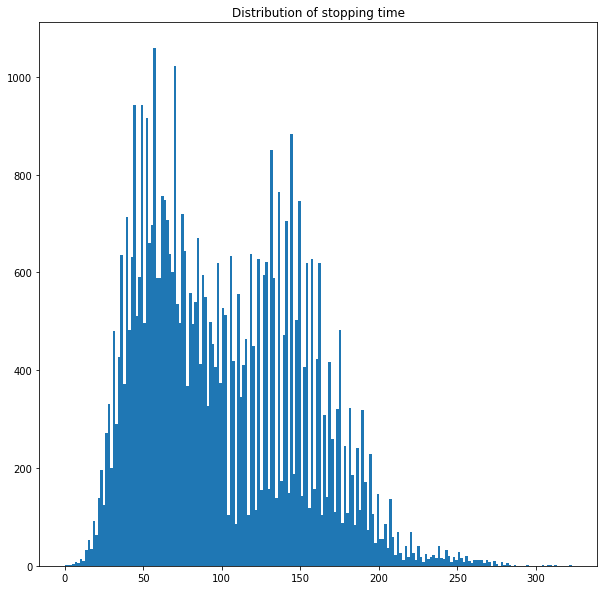

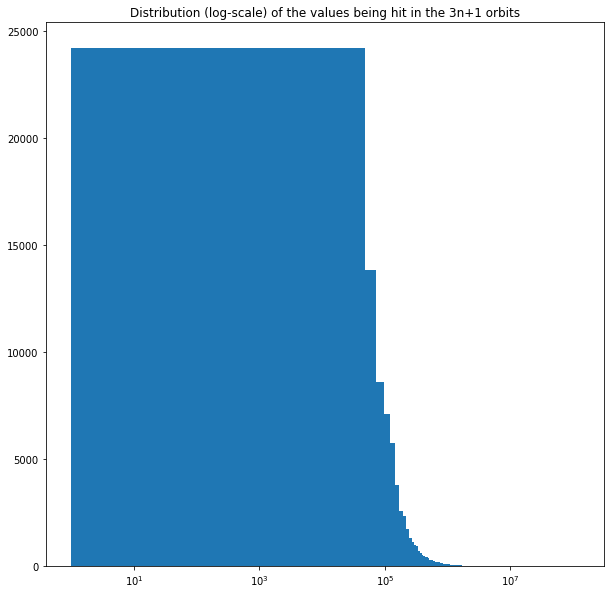

In [14]:
x = np.array([(a, memo[a]) for a in range(1, N)])
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x[:, 0], x[:, 1], s=1)
ax.set_title(f"Stopping time for natural numbers up to {N}")

fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(x[:, 1], bins=200);
ax.set_title("Distribution of stopping time")

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.hist(memo.keys(), bins=5000);
ax.set_xscale('log')
ax.set_title("Distribution (log-scale) of the values being hit in the 3n+1 orbits");